In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from pathlib import Path


In [2]:
df = pd.read_csv('D:/github/python projects/Analysis/sustainable_goal_affordable_ and_clean_renewable_enargy/Analysis/Food waste and research/data/Food Waste data and research - by country.csv')
df.head(10)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,32,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
7,Armenia,137,93,275195,16,46259,28,81775,Very Low Confidence,51,Western Asia,https://www.unep.org/resources/report/unep-foo...
8,Aruba,113,74,7858,13,1362,26,2718,Low Confidence,533,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,36,Australia and New Zealand,https://www.unep.org/resources/report/unep-foo...


In [3]:
print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
display(df.describe().T)


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null   

,count,mean,std,min,25%,50%,75%,max
combined figures (kg/capita/year),214.0,1.267944e+02,2.215788e+01,61.0,115.00,123.0,137.75,260.0
Household estimate (kg/capita/year),214.0,8.429439e+01,1.831371e+01,33.0,74.00,80.0,95.00,189.0
Household estimate (tonnes/year),214.0,2.658896e+06,8.596906e+06,850.0,68315.50,520508.0,2111314.50,91646213.0
Retail estimate (kg/capita/year),214.0,1.511682e+01,5.767840e+00,3.0,13.00,16.0,16.00,79.0
Retail estimate (tonnes/year),214.0,5.520454e+05,2.195578e+06,138.0,12509.25,100650.0,356815.75,22424705.0
Food service estimate (kg/capita/year),214.0,2.738318e+01,6.508420e+00,3.0,26.00,28.0,28.00,90.0
Food service estimate (tonnes/year),214.0,1.138859e+06,5.380459e+06,276.0,22391.25,188466.0,630761.75,65377741.0
M49 code,214.0,4.339720e+02,2.521858e+02,4.0,219.00,432.0,645.25,894.0


### Data cleaning

##### * Rename the colums to make them shorter and easier to work with

In [4]:
df.columns = [
    'country', 'combined_figures_kg_capita_year', 'household_estimate_kg_capita_year',
    'household_estimate_tonnes_year', 'retail_estimate_kg_capita_year',
    'retail_estimate_tonnes_year', 'food_service_estimate_kg_capita_year',
    'food_service_estimate_tonnes_year', 'confidence_in_estimate', 'm49_code',
    'region', 'source'
]

In [5]:
df.head()

,country,combined_figures_kg_capita_year,household_estimate_kg_capita_year,household_estimate_tonnes_year,retail_estimate_kg_capita_year,retail_estimate_tonnes_year,food_service_estimate_kg_capita_year,food_service_estimate_tonnes_year,confidence_in_estimate,m49_code,region,source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


##### * Check for null values 

In [6]:
df.isnull().sum()

country                                 0
combined_figures_kg_capita_year         0
household_estimate_kg_capita_year       0
household_estimate_tonnes_year          0
retail_estimate_kg_capita_year          0
retail_estimate_tonnes_year             0
food_service_estimate_kg_capita_year    0
food_service_estimate_tonnes_year       0
confidence_in_estimate                  0
m49_code                                0
region                                  0
source                                  0
dtype: int64

#### * Check Outliers 

In [7]:
# Check for outliers in each numerical column using the IQR method

numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'num_outliers': outliers.shape[0],
        'outlier_indices': outliers.index.tolist()
    }

# Display outlier counts for each column
for col, summary in outlier_summary.items():
        print(f"{col}: {summary['num_outliers']} outliers")

combined_figures_kg_capita_year: 9 outliers
household_estimate_kg_capita_year: 9 outliers
household_estimate_tonnes_year: 23 outliers
retail_estimate_kg_capita_year: 12 outliers
retail_estimate_tonnes_year: 23 outliers
food_service_estimate_kg_capita_year: 18 outliers
food_service_estimate_tonnes_year: 25 outliers
m49_code: 0 outliers


###### given that size of the dataset we cant drop the outliers 

#### * Histograms and density plots are effective for understanding feature distributions

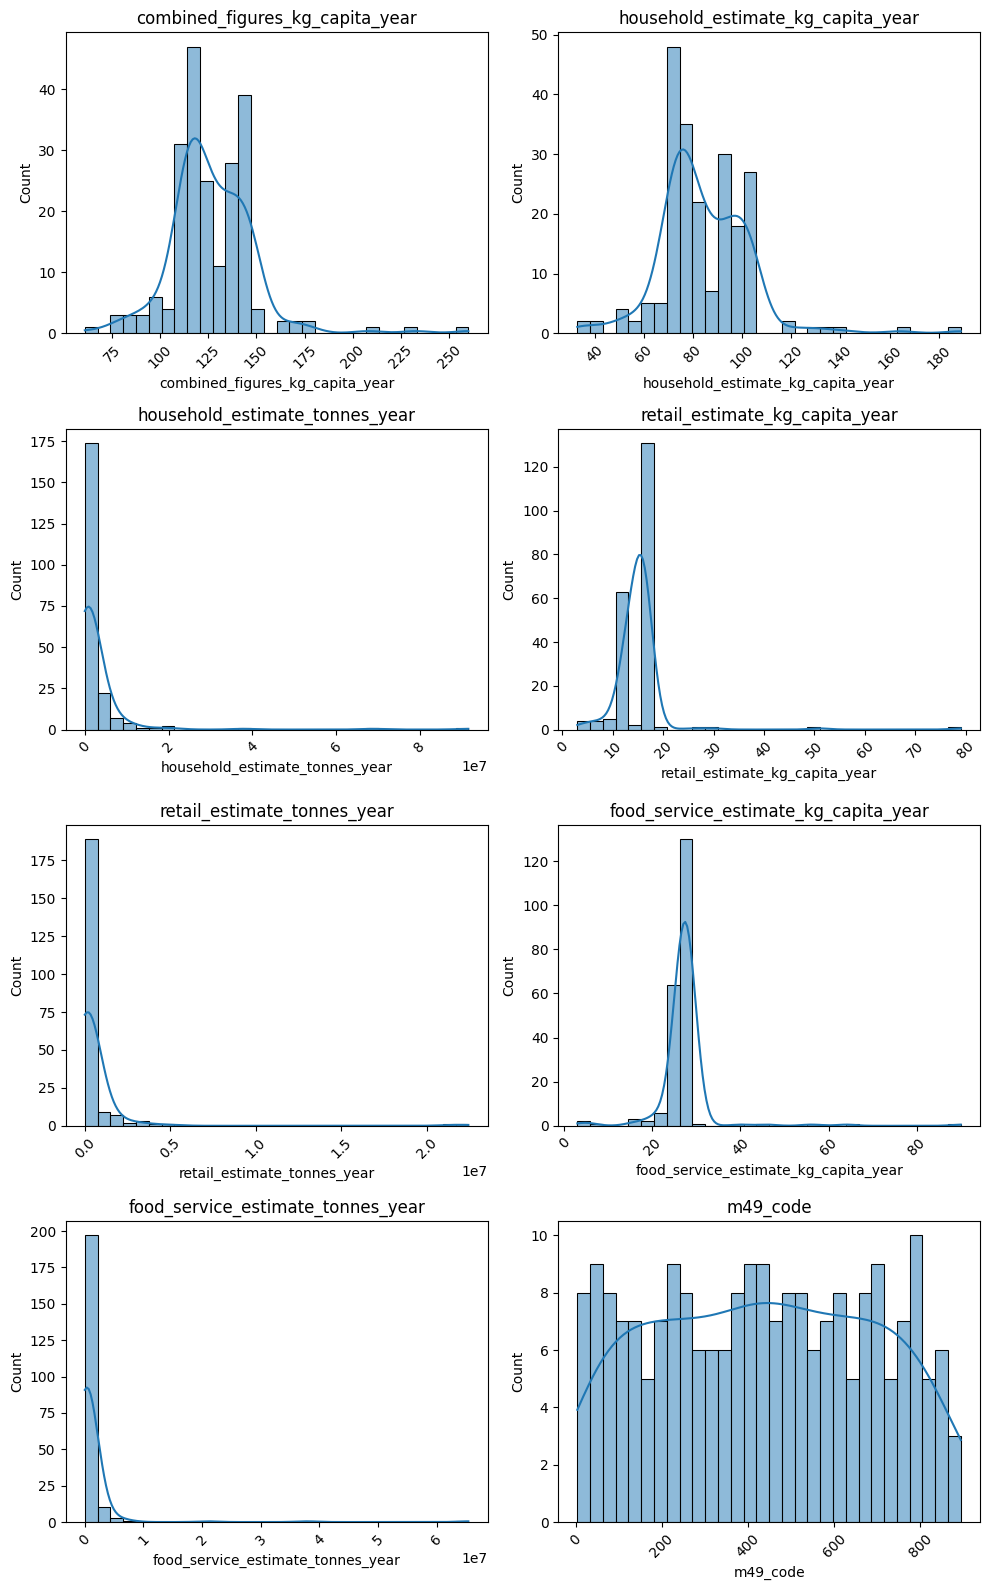

In [8]:
import math

num_cols = len(numeric_cols)
n_cols = 2  # Number of plots per row
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
    
plt.tight_layout()    
 # --- Save the Figure ---
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "Histogram_and_density_plots.png"
plt.savefig(output_filepath)
plt.show()

#### - save the data set 

In [9]:
output_dir = Path.cwd().parent / "data" / "processed"

#if not path exist
output_dir.mkdir(parents=True, exist_ok=True)

output_filepath = output_dir / 'Food_waste_data_and_research_cleaned.csv'
df.to_csv(output_filepath, index=False)
